En aquesta implementació farem servir l'encoding 2 del paper *Optimal Correlation Clustering via MaxSAT*

Primer generem una matriu simètrica binària aleatòria de 10x10

In [ ]:
import numpy as np

def generate_symmetric_binary_matrix(n):
    # Generate a random binary matrix of size (n x n)
    matrix = np.random.randint(2, size=(n, n))
    
    # Make the matrix symmetric
    matrix = np.triu(matrix) + np.triu(matrix, k=1).T
    
    return matrix

# Example usage
n = 10  # Size of the matrix
matrix = generate_symmetric_binary_matrix(n)
print(matrix)

[[0 1 0 0 0 1 1 0 0 0]
 [1 0 0 1 0 1 0 1 0 1]
 [0 0 1 1 0 1 0 0 1 1]
 [0 1 1 1 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 0 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 0 0 1 1 1 0 0 1 0]
 [0 1 0 1 1 1 0 1 0 1]
 [0 0 1 0 0 1 1 0 1 0]
 [0 1 1 0 1 1 0 1 0 1]]


#ENCODING

Definim les variables Yik i les variables auxiliars Aijk i Dij. Fem servir un Upperbound de K=2 clústers, el que es tradueix en N·K = 20 literals.

In [6]:
#y variables, N=10, K=2, N*K=20 variables yik
y11=1
y12=2
y21=3
y22=4
y31=5
y32=6
y41=7
y42=8
y51=9
y52=10
y61=11
y62=12
y71=13
y72=14
y81=15
y82=16
y91=17
y92=18
y101=19
y102=20

In [7]:
#Aijk variables auxiliars, (N * (N - 1) / 2)*K=90 Aijk var
a121=100
a122=101
a131=102
a132=103
a141=104
a142=105
a151=106
a152=107
a161=108
a162=109
a171=110
a172=111
a181=112
a182=113
a191=114
a192=115
a1101=116
a1102=117
a231=118
a232=119
a241=120
a242=121
a251=122
a252=123
a261=124
a262=125
a271=126
a272=127
a281=128
a282=129
a291=130
a292=131
a2101=132
a2102=133
a341=134
a342=135
a351=136
a352=137
a361=138
a362=139
a371=140
a372=141
a381=142
a382=143
a391=144
a392=145
a3101=146
a3102=147
a451=148
a452=149
a461=150
a462=151
a471=152
a472=153
a481=154
a482=155
a491=156
a492=157
a4101=158
a4102=159
a561=160
a562=161
a571=162
a572=163
a581=164
a582=165
a591=166
a592=167
a5101=168
a5102=169
a671=170
a672=171
a681=172
a682=173
a691=174
a692=175
a6101=176
a6102=177
a781=178
a782=179
a791=180
a792=181
a7101=182
a7102=183
a891=184
a892=185
a8101=186
a8102=187
a9101=188
a9102=189

In [8]:
#dij variables auxiliars: (N * (N - 1) / 2) = 45 dij var
d12=200
d13=201
d14=202
d15=203
d16=204
d17=205
d18=206
d19=207
d110=208
d23=209
d24=210
d25=211
d26=212
d27=213
d28=214
d29=215
d210=216
d34=217
d35=218
d36=219
d37=220
d38=221
d39=222
d310=223
d45=224
d46=225
d47=226
d48=227
d49=228
d410=229
d56=230
d57=231
d58=232
d59=233
d510=234
d67=235
d68=236
d69=237
d610=238
d78=239
d79=240
d710=241
d89=242
d810=243
d910=244

Creem les clàusules de l'encoding ExactlyOne, forçant el primer punt al cluster 1.

In [9]:
#encoding exactly one
#exactly_one1=[y11],[-y12]#punt 1 forçat al cluster 1
#exactly_one2=[-y21,-y22],[y21,y22]
#exactly_one3=[-y31,-y32],[y31,y32]
#exactly_one4=[-y41,-y42],[y41,y42]
#exactly_one5=[-y51,-y52],[y51,y52]
#exactly_one6=[-y61,-y62],[y61,y62]
#exactly_one7=[-y71,-y72],[y71,y72]
#exactly_one8=[-y81,-y82],[y81,y82]
#exactly_one9=[-y91,-y92],[y91,y92]
#exactly_one10=[-y101,-y102],[y101,y102]
exactly_one=[[y11],[-y12],[-y21,-y22],[y21,y22],[-y31,-y32],[y31,y32],[-y41,-y42],[y41,y42],[-y51,-y52],[y51,y52],[-y61,-y62],[y61,y62],[-y71,-y72],[y71,y72],[-y81,-y82],[y81,y82],[-y91,-y92],[y91,y92],[-y101,-y102],[y101,y102]]
print(len(exactly_one))

20


Creem ara l'encoding HARD SIMILAR, donat que tenim 23 parelles de punts similars, això es tradueix a 23·K·3 = 138 clàusules.

In [10]:
#encoding hard similar points. 23 similar points * K = 46 series of 3 clauses
#([1,2],[1,6],[1,7])
#([2,4],[2,6],[2,8],[2,10])
#([3,4],[3,6],[3,9],[3,10])
#([4,6],[4,7],[4,8])
#([5,7],[5,8],[5,10])
#([6,7],[6,8],[6,9],[6,10])
#[7,9]
#[8,10]
#(¬Aijk ∨ yik) ∧ (¬Aijk ∨ yjk) ∧ (Aijk ∨ ¬yik ∨ ¬yjk):
hs121=[[-a121,y11],[-a121,y21],[a121,-y11,-y21]]
hs122=[[-a122,y12],[-a122,y22],[a122,-y12,-y22]]
hs161=[[-a161,y11],[-a161,y61],[a161,-y11,-y61]]
hs162=[[-a162,y12],[-a162,y62],[a162,-y12,-y62]]
hs171=[[-a171,y11],[-a171,y71],[a171,-y11,-y71]]
hs172=[[-a172,y12],[-a172,y72],[a172,-y12,-y72]]
hs241=[[-a241,y21],[-a241,y41],[a241,-y21,-y41]]
hs242=[[-a242,y22],[-a242,y42],[a242,-y22,-y42]]
hs261=[[-a261,y21],[-a261,y61],[a261,-y21,-y61]]
hs262=[[-a262,y22],[-a262,y62],[a262,-y22,-y62]]
hs281=[[-a281,y21],[-a281,y81],[a281,-y21,-y81]]
hs282=[[-a282,y22],[-a282,y82],[a282,-y22,-y82]]
hs2101=[[-a2101,y21],[-a2101,y101],[a2101,-y21,-y101]]
hs2102=[[-a2102,y22],[-a2102,y102],[a2102,-y22,-y102]]
hs341=[[-a341,y31],[-a341,y41],[a341,-y31,-y41]]
hs342=[[-a342,y32],[-a342,y42],[a342,-y32,-y42]]
hs361=[[-a361,y31],[-a361,y61],[a361,-y31,-y61]]
hs362=[[-a362,y32],[-a362,y62],[a362,-y32,-y62]]
hs391=[[-a391,y31],[-a391,y91],[a391,-y31,-y91]]
hs392=[[-a392,y32],[-a392,y92],[a392,-y32,-y92]]
hs3101=[[-a3101,y31],[-a3101,y101],[a3101,-y31,-y101]]
hs3102=[[-a3102,y32],[-a3102,y102],[a3102,-y32,-y102]]
hs461=[[-a461,y41],[-a461,y61],[a461,-y41,-y61]]
hs462=[[-a462,y42],[-a462,y62],[a462,-y42,-y62]]
hs471=[[-a471,y41],[-a471,y71],[a471,-y41,-y71]]
hs472=[[-a472,y42],[-a472,y72],[a472,-y42,-y72]]
hs481=[[-a481,y41],[-a481,y81],[a481,-y41,-y81]]
hs482=[[-a482,y42],[-a482,y82],[a482,-y42,-y82]]
hs571=[[-a571,y51],[-a571,y71],[a571,-y51,-y71]]
hs572=[[-a572,y52],[-a572,y72],[a572,-y52,-y72]]
hs581=[[-a581,y51],[-a581,y81],[a581,-y51,-y81]]
hs582=[[-a582,y52],[-a582,y82],[a582,-y52,-y82]]
hs5101=[[-a5101,y51],[-a5101,y101],[a5101,-y51,-y101]]
hs5102=[[-a5102,y52],[-a5102,y102],[a5102,-y52,-y102]]
hs671=[[-a671,y61],[-a671,y71],[a671,-y61,-y71]]
hs672=[[-a672,y62],[-a672,y72],[a672,-y62,-y72]]
hs681=[[-a681,y61],[-a681,y81],[a681,-y61,-y81]]
hs682=[[-a682,y62],[-a682,y82],[a682,-y62,-y82]]
hs691=[[-a691,y61],[-a691,y91],[a691,-y61,-y91]]
hs692=[[-a692,y62],[-a692,y92],[a692,-y62,-y92]]
hs6101=[[-a6101,y61],[-a6101,y101],[a6101,-y61,-y101]]
hs6102=[[-a6102,y62],[-a6102,y102],[a6102,-y62,-y102]]
hs791=[[-a791,y71],[-a791,y91],[a791,-y71,-y91]]
hs792=[[-a792,y72],[-a792,y92],[a792,-y72,-y92]]
hs8101=[[-a8101,y81],[-a8101,y101],[a8101,-y81,-y101]]
hs8102=[[-a8102,y82],[-a8102,y102],[a8102,-y82,-y102]]
hs_l=[hs121,hs122,hs161,hs162,hs171,hs172,hs241,hs242,hs261,hs262,hs281,hs282,hs2101,hs2102,hs341,hs342,hs361,hs362,hs391,hs392,hs3101,hs3102,
      hs461,hs462,hs471,hs472,hs481,hs482,hs571,hs572,hs581,hs582,hs5101,hs5102,hs671,hs672,hs681,hs682,hs691,hs692,hs6101,hs6102,hs791,hs792,
      hs8101,hs8102]

In [11]:
hs=[]
for i in hs_l:
  hs.extend(i) #adding all HARD SIMILAR CLAUSES to a list hs
print(len(hs))#46*3=138 clauses

138


Creem ara l'encoding SOFT SIMILAR, donat que tenim 23 parelles de punts similars i K=2, això es tradueix a 23 clàusules de 2 literals.

In [97]:
#encoding soft similar points. 23 similar points = 23 clauses
#([1,2],[1,6],[1,7])
#([2,4],[2,6],[2,8],[2,10])
#([3,4],[3,6],[3,9],[3,10])
#([4,6],[4,7],[4,8])
#([5,7],[5,8],[5,10])
#([6,7],[6,8],[6,9],[6,10])
#[7,9]
#[8,10]
#(Aij1 ∨ ... ∨ AijK):
ss12=[a121,a122]
ss16=[a161,a162]
ss17=[a171,a172]
ss24=[a241,a242]
ss26=[a261,a262]
ss28=[a281,a282]
ss210=[a2101,a2102]
ss34=[a341,a342]
ss36=[a361,a362]
ss39=[a391,a392]
ss310=[a3101,a3102]
ss46=[a461,a462]
ss47=[a471,a472]
ss48=[a481,a482]
ss57=[a571,a572]
ss58=[a581,a582]
ss510=[a5101,a5102]
ss67=[a671,a672]
ss68=[a681,a682]
ss69=[a691,a692]
ss610=[a6101,a6102]
ss79=[a791,a792]
ss810=[a8101,a8102]
ss=[ss12,ss16,ss17,ss24,ss26,ss28,ss210,ss34,ss36,ss39,ss310,ss46,ss47,ss48,ss57,ss58,ss510,
      ss67,ss68,ss69,ss610,ss79,ss810] #adding all SOFT SIMILAR CLAUSES to a list ss
print(len(ss))#23 clauses of 2 literals

23


Creem ara l'encoding HARD DISSIMILAR, donat que tenim 22 parelles de punts dissimilars i K=2, això es tradueix a 22·K = 44 clàusules de 3 literals.

In [13]:
#encoding hard dissimilar points. 22 similar points * K = 44 clauses
#([1,3],[1,4],[1,5],[1,8],[1,9],[1,10])
#([2,3],[2,5],[2,7],[2,9])
#([3,5],[3,7],[3,8])
#([4,5],[4,9],[4,10])
#([5,6],[5,9])
#([7,8],[7,10])
#[8,9]
#[9,10]
#(dij ∨ ¬yik ∨ ¬yjk):
hd131=[d13,-y11,-y31]
hd132=[d13,-y12,-y32]
hd141=[d14,-y11,-y41]
hd142=[d14,-y12,-y42]
hd151=[d15,-y11,-y51]
hd152=[d15,-y12,-y52]
hd181=[d18,-y11,-y81]
hd182=[d18,-y12,-y82]
hd191=[d19,-y11,-y91]
hd192=[d19,-y12,-y92]
hd1101=[d110,-y11,-y101]
hd1102=[d110,-y12,-y102]
hd231=[d23,-y21,-y31]
hd232=[d23,-y22,-y32]
hd251=[d25,-y21,-y51]
hd252=[d25,-y22,-y52]
hd271=[d27,-y21,-y71]
hd272=[d27,-y22,-y72]
hd291=[d29,-y21,-y91]
hd292=[d29,-y22,-y92]
hd351=[d35,-y31,-y51]
hd352=[d35,-y32,-y52]
hd371=[d37,-y31,-y71]
hd372=[d37,-y32,-y72]
hd381=[d38,-y31,-y81]
hd382=[d38,-y32,-y82]
hd451=[d45,-y41,-y51]
hd452=[d45,-y42,-y52]
hd491=[d49,-y41,-y91]
hd492=[d49,-y42,-y92]
hd4101=[d410,-y41,-y101]
hd4102=[d410,-y42,-y102]
hd561=[d56,-y51,-y61]
hd562=[d56,-y52,-y62]
hd591=[d59,-y51,-y91]
hd592=[d59,-y52,-y92]
hd781=[d78,-y71,-y81]
hd782=[d78,-y72,-y82]
hd7101=[d710,-y71,-y101]
hd7102=[d710,-y72,-y102]
hd891=[d89,-y81,-y91]
hd892=[d89,-y82,-y92]
hd9101=[d910,-y91,-y101]
hd9102=[d910,-y92,-y102]
hd=[hd131,hd132,hd141,hd142,hd151,hd152,hd181,hd182,hd191,hd192,hd1101,hd1102,hd231,hd232,hd251,hd252,hd271,
      hd272,hd291,hd292,hd351,hd352,hd371,hd372,hd381,hd382,hd451,hd452,hd491,hd492,hd4101,hd4102,hd561,
    hd562,hd591,hd592,hd781,hd782,hd7101,hd7102,hd891,hd892,hd9101,hd9102] #adding all HARD DISSIMILAR CLAUSES to a list hd
print(len(hd))#44 clauses of 3 literals

44


Creem ara l'encoding SOFT DISSIMILAR, donat que tenim 22 parelles de punts dissimilars, això es tradueix en 22 clàusules d'1 literal.

In [14]:
#encoding soft dissimilar points. 22 similar points = 22 clauses
#([1,3],[1,4],[1,5],[1,8],[1,9],[1,10])
#([2,3],[2,5],[2,7],[2,9])
#([3,5],[3,7],[3,8])
#([4,5],[4,9],[4,10])
#([5,6],[5,9])
#([7,8],[7,10])
#[8,9]
#[9,10]
#(¬dij):
sd13=[-d13]
sd14=[-d14]
sd15=[-d15]
sd18=[-d18]
sd19=[-d19]
sd110=[-d110]
sd23=[-d23]
sd25=[-d25]
sd27=[-d27]
sd29=[-d29]
sd35=[-d35]
sd37=[-d37]
sd38=[-d38]
sd45=[-d45]
sd49=[-d49]
sd410=[-d410]
sd56=[-d56]
sd59=[-d59]
sd78=[-d78]
sd710=[-d710]
sd89=[-d89]
sd910=[-d910]
sd=[sd13,sd14,sd15,sd18,sd19,sd110,sd23,sd25,sd27,sd29,sd35,sd37,sd38,sd45,sd49,sd410,sd56,sd59,sd78,sd710,sd89,sd910]
print(len(sd))#22 clauses of 1 literals

22


Importem llibreries:

In [ ]:
!pip install python-sat[aiger,approxmc,pblib]

In [20]:
from pysat.formula import WCNF
from pysat.examples.rc2 import RC2

Creem la CNF amb les clàusules HARD i SOFT.

In [98]:
wcnf = WCNF()
wcnf.extend(exactly_one)  # 20 adding hard clauses
wcnf.extend(hs)  # adding 138 hard similar clauses
wcnf.extend(hd)  # adding 44 hard dissimilar clauses
wcnf.extend(ss, weights=[1] * 23)  # adding 23 soft similarity clauses 
wcnf.extend(sd, weights=[1] * 22)  # adding 22 soft dissimilarity clauses
print(len(wcnf.hard))
print(len(wcnf.soft))
print(wcnf.wght)

202
45
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Trobem una solució MaxSAT amb l'algorisme RC2

In [99]:
rc2 = RC2(wcnf)
model = rc2.compute()
print(model)

print(rc2.cost)#cost de 14

[1, -2, -3, 4, -5, 6, -7, 8, 9, -10, -11, 12, 13, -14, -15, 16, 17, -18, -19, 20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64, -65, -66, -67, -68, -69, -70, -71, -72, -73, -74, -75, -76, -77, -78, -79, -80, -81, -82, -83, -84, -85, -86, -87, -88, -89, -90, -91, -92, -93, -94, -95, -96, -97, -98, -99, -100, -101, -102, -103, -104, -105, -106, -107, -108, -109, 110, -111, -112, -113, -114, -115, -116, -117, -118, -119, -120, 121, -122, -123, -124, 125, -126, -127, -128, 129, -130, -131, -132, 133, -134, 135, -136, -137, -138, 139, -140, -141, -142, -143, -144, -145, -146, 147, -148, -149, -150, 151, -152, -153, -154, 155, -156, -157, -158, -159, -160, -161, 162, -163, -164, -165, -166, -167, -168, -169, -170, -171, -172, 173, -174, -175, -176, 177, -178, -179, 180, -181, -182, -183, -184, -185, -186, 187, -188, -189

El clustering òptim és el format per:

1.   [1,5,7,9]
2.   [2,3,4,6,8,10]

Amb un cost de 14 clàusules SOFT insatisfetes.

Calculem els literals auxiliars positius del model aijk i dij.

Els literals positius entre 100 i 200 (aijk) són els rellevants per satisfer les clàusules SOFT SIMILARITY.

El literals positius superiors a 200 (dij) porten a violar les clàusules SOFT DISSIMILARITY, al requerir aquestes el literal negat per ser satisfetes.

In [101]:
lit=[]
for num in model:
    if (num > 0) & (num>20):
        lit.append(num)
print(len(lit))

21


In [102]:
lit

[110,
 121,
 125,
 129,
 133,
 135,
 139,
 147,
 151,
 155,
 162,
 173,
 177,
 180,
 187,
 203,
 207,
 209,
 221,
 229,
 233]

In [103]:
# Get the satisfied soft similarity clauses
satisfied_ss=[clause for idx,clause in enumerate(wcnf.soft[:23]) if any(i in clause for i in lit)]

In [104]:
# Get the insatisfied soft similarity clauses
unsatisfied_ss = [sublist for sublist in wcnf.soft[:23] if sublist not in satisfied_ss]

In [105]:
unsatisfied_ss

[[100, 101, -245],
 [108, 109, -246],
 [144, 145, -254],
 [152, 153, -257],
 [164, 165, -260],
 [168, 169, -261],
 [170, 171, -262],
 [174, 175, -264]]

Com hem vist abans el clustering òptim és el format per:

1.   [1,5,7,9]
2.   [2,3,4,6,8,10]

Clàusules de soft dissimilarity NO complertes:

1.   [-203] = 1 i 5 van junts i haurien danar separats
2.   [-207] = 1 i 9 van junts i haurien danar separats
3.   [-209] = 2 i 3 van junts i haurien danar separats
4.   [-221] = 3 i 8 van junts i haurien danar separats
5.   [-229] = 4 i 10 van junts i haurien danar separats
6.   [-233] = 5 i 9 van junts i haurien danar separats

Clàusules de soft similarity NO complertes:

1.   [100, 101] = 1 i 2 van separats i haurien d'anar junts
2.   [108, 109] = 1 i 6 van separats i haurien d'anar junts
3.   [144, 145] = 3 i 9 van separats i haurien d'anar junts
4.   [152, 153] = 4 i 7 van separats i haurien d'anar junts
5.   [164, 165] = 5 i 8 van separats i haurien d'anar junts
6.   [168, 169] = 5 i 10 van separats i haurien d'anar junts
7.   [170, 171] = 6 i 7 van separats i haurien d'anar junts
8.   [174, 175] = 6 i 9 van separats i haurien d'anar junts

Com podem veure, tots els resultats concorden. Així doncs el clustering òptim te un cost de 14.

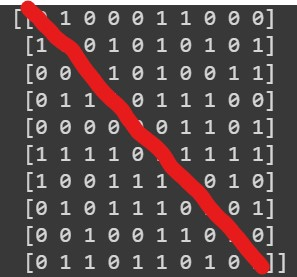